In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ImageSharpening:
    def __init__(self, input_path, output_path_original, output_path_sharpened):
        self.input_path = input_path
        self.output_path_original = output_path_original
        self.output_path_sharpened = output_path_sharpened

    def read_image(self):
        """Reads the image from the specified path."""
        return cv2.imread(self.input_path, cv2.IMREAD_GRAYSCALE)

    def apply_laplacian_sharpening(self, image):
        """Applies the Laplacian filter for image sharpening."""
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        sharpened = image - laplacian
        return cv2.convertScaleAbs(sharpened)

    def save_image(self, image, path):
        """Saves the image to the specified path."""
        cv2.imwrite(path, image)

    def display_images(self, original, sharpened):
        """Displays the original and sharpened images side by side."""
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(original, cmap='gray')
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(sharpened, cmap='gray')
        axes[1].set_title("Sharpened Image")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

    def process(self):
        """Main processing function."""
        original = self.read_image()
        self.save_image(original, self.output_path_original)

        sharpened = self.apply_laplacian_sharpening(original)
        self.save_image(sharpened, self.output_path_sharpened)

        self.display_images(original, sharpened)


In [4]:
# Paths for input and output
image_path = "/content/moon-blur.jpg"
original_output_path = "/content/origin-moon-blur.jpg"
sharpened_output_path = "/content/sharpen-moon-blur.jpg"

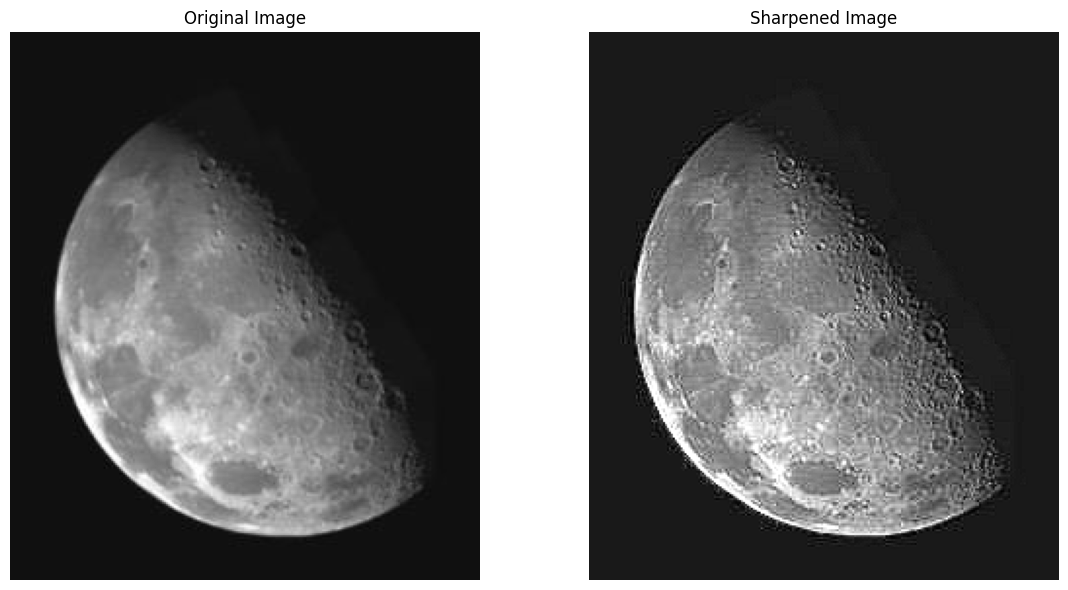

In [5]:
sharpening_processor = ImageSharpening(image_path, original_output_path, sharpened_output_path)
sharpening_processor.process()